In [71]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy.stats import norm, poisson
from scipy.optimize import curve_fit
from os.path import join, abspath
import sys
from os import pardir, mkdir
from tqdm import tqdm
from hammer import dm

In [72]:
root_dir = abspath(pardir)
root_dir

'/home2/s20321005/Thesis-Project'

In [73]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/3_Vertical_Velocity',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project',
 '/home2/s20321005/Thesis-Project',
 '/home2/s20321005',
 '/home2/s20321005']

In [74]:
from utils import safe_mkdir, style

In [75]:
style()

In [76]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [77]:
spectral_dir = join(root_data_dir, "Spectral-Class-Cluster-no")
spectral_dir

'/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no'

In [78]:
name = "Velocity-Distribution-no"
vel_dir = join(root_data_dir, name)
safe_mkdir(vel_dir)

Directory /home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no already exist. Good to go!


In [127]:
spectral_dir

'/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no'

In [126]:
files = glob(join(spectral_dir, "gaia*.hdf5"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(-0.10)_(0.11).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.11)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.20)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.27)_(0.29).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.29)_(0.31).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.31)_(0.33).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.33)_(0.35).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.35)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.37)_(0.38).hdf5'

In [19]:
index = 0
gaia_raw = vaex.open(files[index])
gaia_raw

#      ra                     dec                  Jmag                Kmag                ph_qual    source_id            pm                  pmra                 e_pmra                pmdec                e_pmdec               parallax            e_parallax            gmag                bpmag              rpmag              fb_over_err         fr_over_err        ruwe                excess_factor       GLON                 GLAT                   distance_gspphot    distance_gspphot_lower    distance_gspphot_upper    ag_gspphot             ag_gspphot_lower       ag_gspphot_upper      fem_gspspec    fem_gspspec_lower    fem_gspspec_upper    spectraltype_esphs    subclass_lamost    rv                    rv_cat    rv_el                rv_eu                rv_sym    teff              teff_cat    teff_el        teff_eu         teff_sym    logg                logg_cat    logg_el                logg_eu                logg_sym    feh    feh_cat    feh_el    feh_eu    feh_sym    mh                    mh_cat    mh_el                 mh_eu                  mh_sym    alphafe              alphafe_cat    alphafe_el    alphafe_eu    alphafe_sym    alpham    alpham_cat    alpham_el    alpham_eu    alpham_sym    JK                     M_J                 Dist                z                    r                   pmlon                pmlat                e_pmlon               e_pmlat               vb                   vphi                 e_vb                   e_vphi                 w                    e_rv                 e_w                  v_xy                  e_v_xy               v                    e_v                  u                    e_u                   M_J_lower            M_J_upper
0      0.014884639099905679   -0.6277107372592441  8.755000114440918   8.656999588012695   AAA        2309518882743792512  23.22193717956543   22.29106181287425    0.015476686879992485  6.508986172951364    0.016319049522280693  4.789413549620276   0.020170677453279495  9.131726264953613   9.230249404907227  8.934432983398438  1889.544189453125   2443.355224609375  1.1517304182052612  1.167120337486267   2.951179464847555    -1.3351842543237686    208.5220947265625   204.33360290527344        210.59359741210938        0.003100000089034438   0.0010000000474974513  0.00570000009611249   nan            nan                  nan                  A                     --                 13.979635238647461    gaia      0.8730981349945068   0.8730981349945068   1.0       7851.72216796875  gspphot     7.68994140625  6.4814453125    0.0         4.14709997177124    gspphot     0.008999824523925781   0.014599800109863281   0.0         nan    --         nan       nan       nan        -1.2071000337600708   gspphot   0.004799962043762207  0.006800055503845215   0.0       0.12999999523162842  rave           nan           nan           -1.0           nan       --            nan          nan          nan           0.09800052642822266    2.1564118070290146  208.79383031755194  -203.02519970723176  48.7404540655227    -8.415224816113692   -21.64352857182297   0.016011703235616633  0.015794447555597668  -21.420227000145907  -8.328402885890153   -0.09155582963669412   -0.038488697266941825  -18.593699921256633  0.8730981349945068   0.8492448485468144   -17.56504054597298    0.22240955574805651  15.671299950086627   0.21851120838760413  11.50231723983446    0.056570682463120345  0.656183260425856    2.2724350893667364
1      0.01692606345950085    0.3891393605162341   7.978000164031982   7.916999816894531   AAA        2847236045035991808  7.534960746765137   0.31428973130157245  0.028740057721734047  -7.528403412132262   0.035291653126478195  5.414626649593402   0.03218960762023926   8.257993698120117   8.308849334716797  8.131924629211426  1606.518310546875   3663.614990234375  1.0435644388198853  1.1647926568984985  -1.2447639901461083  -0.6851463533673376    185.764404296875    183.57119750976562        187.21949768066406        0.40720000863075256    0.4049000144

check out high error data

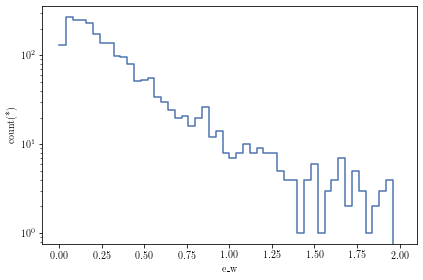

In [20]:
gaia_raw.viz.histogram("e_w", limits=[0, 2], shape=50)
plt.yscale("log")

In [21]:
gaia = gaia_raw
gaia

#      ra                     dec                  Jmag                Kmag                ph_qual    source_id            pm                  pmra                 e_pmra                pmdec                e_pmdec               parallax            e_parallax            gmag                bpmag              rpmag              fb_over_err         fr_over_err        ruwe                excess_factor       GLON                 GLAT                   distance_gspphot    distance_gspphot_lower    distance_gspphot_upper    ag_gspphot             ag_gspphot_lower       ag_gspphot_upper      fem_gspspec    fem_gspspec_lower    fem_gspspec_upper    spectraltype_esphs    subclass_lamost    rv                    rv_cat    rv_el                rv_eu                rv_sym    teff              teff_cat    teff_el        teff_eu         teff_sym    logg                logg_cat    logg_el                logg_eu                logg_sym    feh    feh_cat    feh_el    feh_eu    feh_sym    mh                    mh_cat    mh_el                 mh_eu                  mh_sym    alphafe              alphafe_cat    alphafe_el    alphafe_eu    alphafe_sym    alpham    alpham_cat    alpham_el    alpham_eu    alpham_sym    JK                     M_J                 Dist                z                    r                   pmlon                pmlat                e_pmlon               e_pmlat               vb                   vphi                 e_vb                   e_vphi                 w                    e_rv                 e_w                  v_xy                  e_v_xy               v                    e_v                  u                    e_u                   M_J_lower            M_J_upper
0      0.014884639099905679   -0.6277107372592441  8.755000114440918   8.656999588012695   AAA        2309518882743792512  23.22193717956543   22.29106181287425    0.015476686879992485  6.508986172951364    0.016319049522280693  4.789413549620276   0.020170677453279495  9.131726264953613   9.230249404907227  8.934432983398438  1889.544189453125   2443.355224609375  1.1517304182052612  1.167120337486267   2.951179464847555    -1.3351842543237686    208.5220947265625   204.33360290527344        210.59359741210938        0.003100000089034438   0.0010000000474974513  0.00570000009611249   nan            nan                  nan                  A                     --                 13.979635238647461    gaia      0.8730981349945068   0.8730981349945068   1.0       7851.72216796875  gspphot     7.68994140625  6.4814453125    0.0         4.14709997177124    gspphot     0.008999824523925781   0.014599800109863281   0.0         nan    --         nan       nan       nan        -1.2071000337600708   gspphot   0.004799962043762207  0.006800055503845215   0.0       0.12999999523162842  rave           nan           nan           -1.0           nan       --            nan          nan          nan           0.09800052642822266    2.1564118070290146  208.79383031755194  -203.02519970723176  48.7404540655227    -8.415224816113692   -21.64352857182297   0.016011703235616633  0.015794447555597668  -21.420227000145907  -8.328402885890153   -0.09155582963669412   -0.038488697266941825  -18.593699921256633  0.8730981349945068   0.8492448485468144   -17.56504054597298    0.22240955574805651  15.671299950086627   0.21851120838760413  11.50231723983446    0.056570682463120345  0.656183260425856    2.2724350893667364
1      0.01692606345950085    0.3891393605162341   7.978000164031982   7.916999816894531   AAA        2847236045035991808  7.534960746765137   0.31428973130157245  0.028740057721734047  -7.528403412132262   0.035291653126478195  5.414626649593402   0.03218960762023926   8.257993698120117   8.308849334716797  8.131924629211426  1606.518310546875   3663.614990234375  1.0435644388198853  1.1647926568984985  -1.2447639901461083  -0.6851463533673376    185.764404296875    183.57119750976562        187.21949768066406        0.40720000863075256    0.4049000144

In [22]:
zs = gaia['z'].to_numpy()
ws = gaia['w'].to_numpy()
ews = gaia['e_w'].to_numpy()
mask = ~np.isnan(ws) & ~np.isnan(ews) & (np.abs(zs) < 50)
ws = ws[mask]
ews = ews[mask]

med = np.median(ws)
mad = np.median(np.abs(ws-med))
BIN = 20
wedge = np.linspace(med-mad*6, med+mad*6, BIN+1)
wedge

array([-29.63489298, -27.32123584, -25.0075787 , -22.69392155,
       -20.38026441, -18.06660727, -15.75295012, -13.43929298,
       -11.12563584,  -8.8119787 ,  -6.49832155,  -4.18466441,
        -1.87100727,   0.44264988,   2.75630702,   5.06996416,
         7.38362131,   9.69727845,  12.01093559,  14.32459274,
        16.63824988])

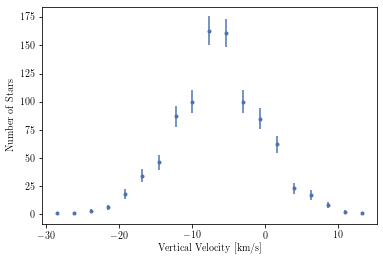

In [23]:
wmid = (wedge[1:] + wedge[:-1]) / 2
wnum, _ = np.histogram(ws, wedge)
mask = wnum > 0
wnum = wnum[mask]
wmid = wmid[mask]
werr = np.sqrt(wnum)
max = np.max(wnum)
# wnum, werr = wnum/max, werr/max
plt.errorbar(wmid, wnum, yerr=werr, fmt='.')
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.show()

In [24]:
M = 100_000
log_w = np.empty(M, dtype=float)
ns_est = np.empty((M, len(wmid)), dtype=int)
for i in tqdm(range(M)):
    x_realization = np.random.normal(loc=ws, scale=ews, size=len(ws))
    ns_est_i = np.histogram(x_realization, bins=wedge)[0]
    ns_est[i] = ns_est_i[mask]

100%|██████████| 100000/100000 [00:25<00:00, 3923.35it/s]


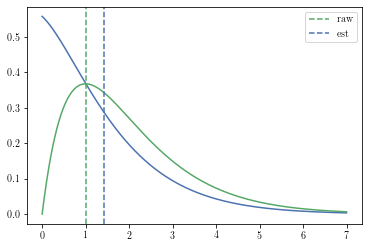

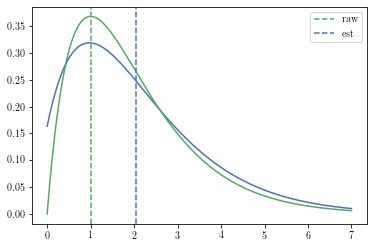

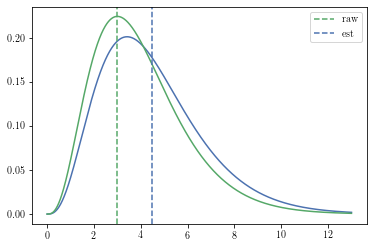

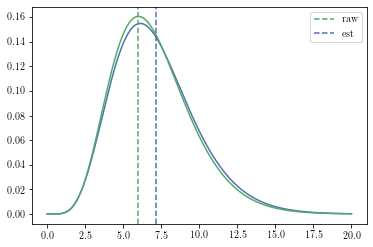

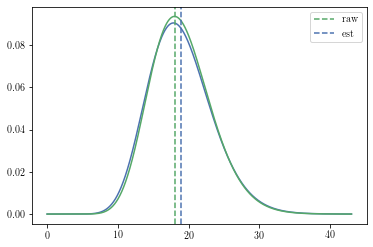

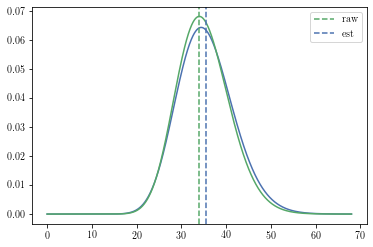

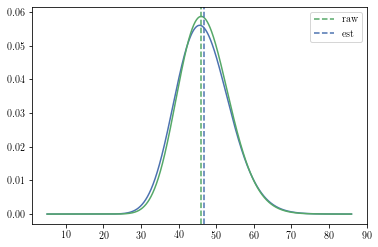

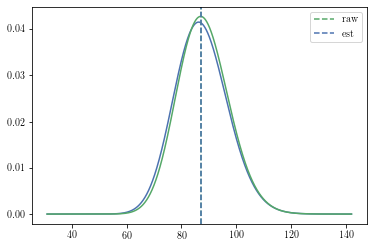

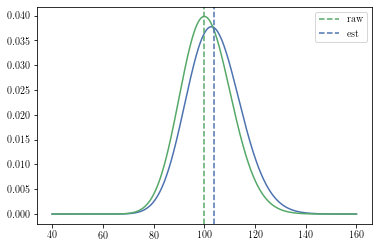

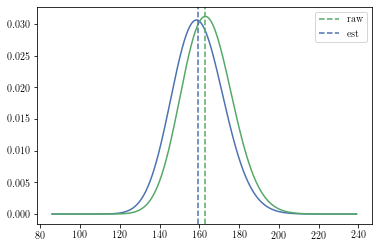

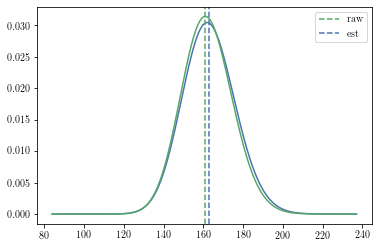

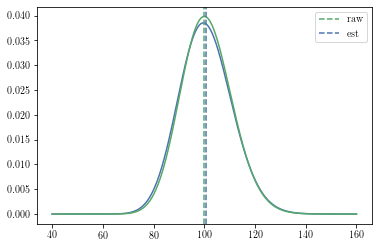

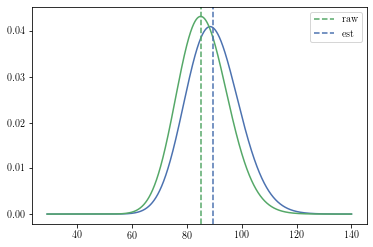

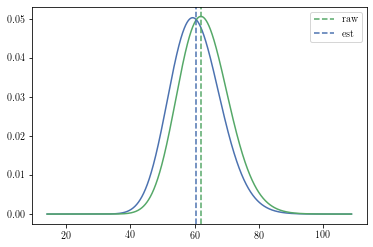

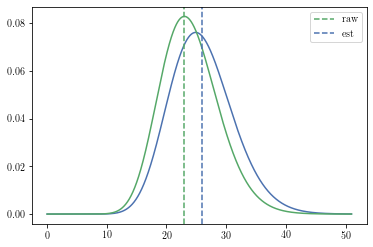

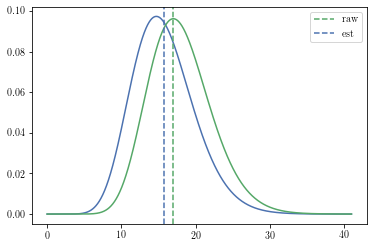

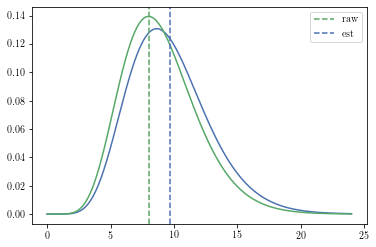

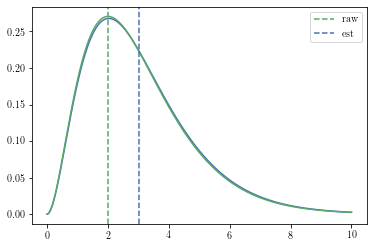

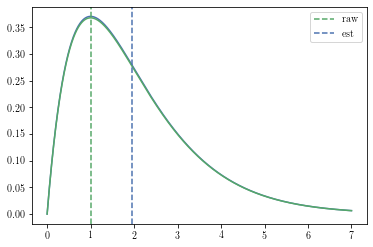

In [25]:
w_est = np.empty_like(wnum)
w_err = np.empty_like(wnum)
for i in range(len(wmid)):
    nw_min = np.floor(ns_est[:, i].min())
    nw_max = np.ceil(ns_est[:, i].max())
    bins = np.arange(nw_min-1/2, nw_max+1/2)
    w, n_edge = np.histogram(ns_est[:, i], bins=bins, density=True)
    ns = (n_edge[1:] + n_edge[:-1]) / 2
    mask = w > 0
    w = w[mask]
    ns = ns[mask]
    m = 6
    lambdas = np.linspace(np.maximum(0, np.floor(wnum[i]-m*werr[i])), np.floor(wnum[i]+m*werr[i]), 10_000)
    dlambda = lambdas[1] - lambdas[0]
    pn = np.sum(w[:, None]*poisson.pmf(ns[:,None], lambdas[None, :]), axis=0)
    area = np.trapz(pn, lambdas)
    pn = pn / area
    mu = np.sum(pn * lambdas)*dlambda
    wi_est = mu
    w_est[i] = wi_est
    Elambda2 = np.sum(pn * lambdas**2)*dlambda
    sigma2 = Elambda2 - mu**2
    wi_err = np.sqrt(sigma2)
    w_err[i] = wi_err
    
    plt.plot(lambdas, pn, c='C0')
    plt.plot(lambdas, poisson.pmf(wnum[i], lambdas), 'C1')
    plt.axvline(wnum[i], c='C1', ls='--', label='raw')
    plt.axvline(wi_est, c='C0', ls='--', label="est")
    plt.legend()
    plt.show()
    # break

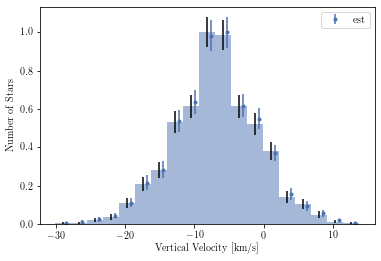

In [26]:
dw = np.min(np.diff(wedge))
plt.bar(wmid-0.5, wnum/wnum.max(), yerr=werr/wnum.max(), width=dw, alpha=0.5)
plt.errorbar(wmid, w_est/w_est.max(), yerr=w_err/w_est.max(), fmt='.', label="est")
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.legend()
# plt.yscale('log')
plt.show()

In [30]:
wnum, werr = w_est/w_est.max(), w_err/w_est.max()

In [52]:
name = files[index].split("/")[-1].replace("gaia", "w")
df = vaex.from_arrays(mid=wmid, num=wnum, err=werr)
df

#    mid                  num                   err
0    -28.478064411767654  0.006172839506172839  0.006172839506172839
1    -26.164407268643416  0.012345679012345678  0.006172839506172839
2    -23.850750125519184  0.024691358024691357  0.012345679012345678
3    -21.537092982394952  0.043209876543209874  0.012345679012345678
4    -19.223435839270714  0.1111111111111111    0.024691358024691357
...  ...                  ...                   ...
14   3.9131355919716277   0.15432098765432098   0.030864197530864196
15   6.226792735095863    0.09259259259259259   0.024691358024691357
16   8.540449878220095    0.05555555555555555   0.018518518518518517
17   10.85410702134433    0.018518518518518517  0.006172839506172839
18   13.167764164468565   0.006172839506172839  0.006172839506172839

In [53]:
data_dir

'/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no'

In [54]:
df.export(join(data_dir, name), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

# automate finding histogram with error

In [62]:
files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(-0.10)_(0.11).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.11)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.20)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.27)_(0.29).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.29)_(0.31).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.31)_(0.33).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.33)_(0.35).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.35)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.37)_(0.38).hdf5'

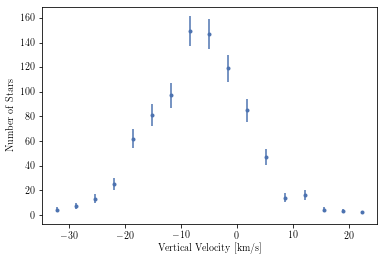

100%|██████████| 100000/100000 [00:14<00:00, 6784.07it/s]


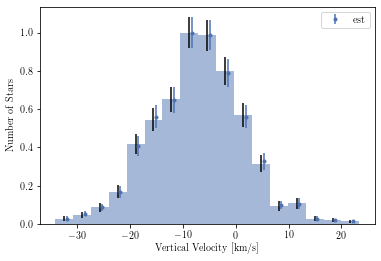

export(hdf5) [########################################] 100.00% elapsed time  :     0.07s =  0.0m =  0.0h
 saved w_(0.16)_(0.20).hdf5


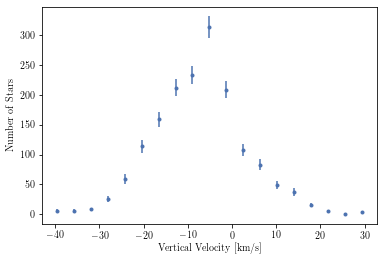

100%|██████████| 100000/100000 [00:23<00:00, 4266.28it/s]


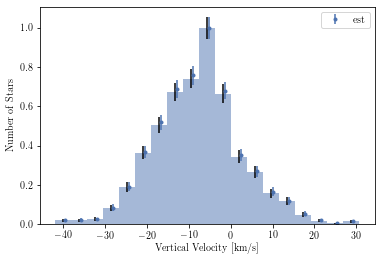

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.20)_(0.24).hdf5


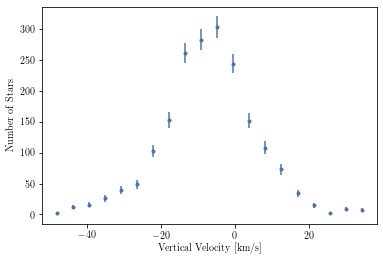

100%|██████████| 100000/100000 [00:25<00:00, 3870.41it/s]


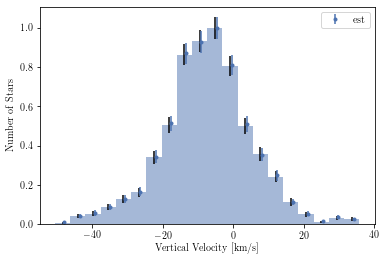

export(hdf5) [########################################] 100.00% elapsed time  :     0.11s =  0.0m =  0.0h
 saved w_(0.24)_(0.27).hdf5


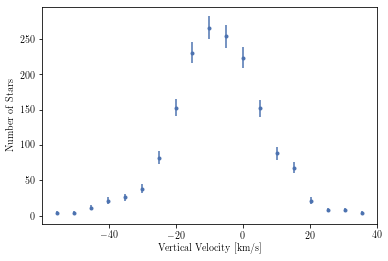

100%|██████████| 100000/100000 [00:23<00:00, 4318.97it/s]


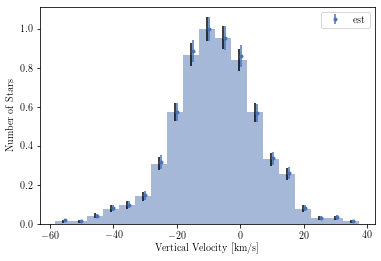

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.27)_(0.29).hdf5


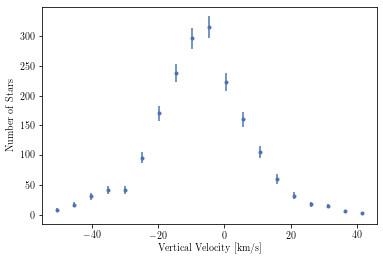

100%|██████████| 100000/100000 [00:26<00:00, 3832.29it/s]


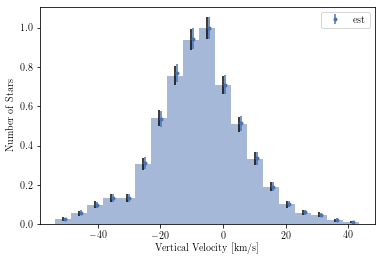

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.29)_(0.31).hdf5


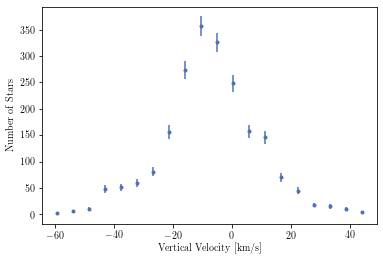

100%|██████████| 100000/100000 [00:28<00:00, 3561.01it/s]


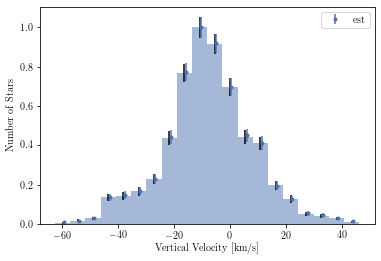

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 saved w_(0.31)_(0.33).hdf5


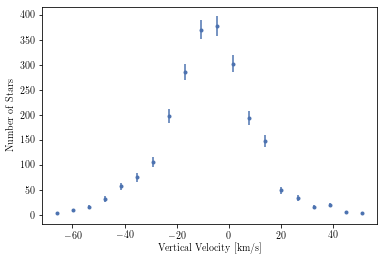

100%|██████████| 100000/100000 [00:30<00:00, 3327.60it/s]


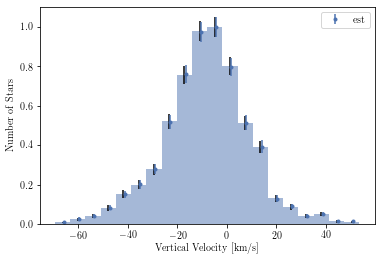

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.33)_(0.35).hdf5


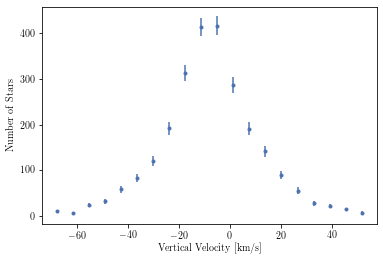

100%|██████████| 100000/100000 [00:33<00:00, 3020.08it/s]


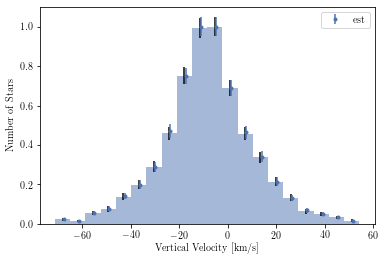

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.35)_(0.37).hdf5


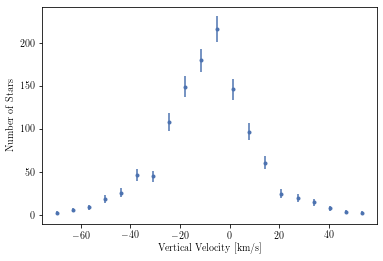

100%|██████████| 100000/100000 [00:18<00:00, 5440.43it/s]


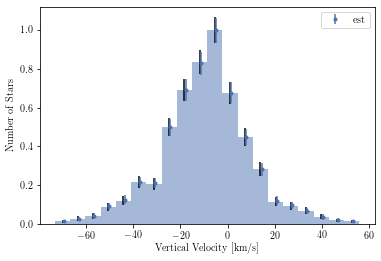

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.37)_(0.38).hdf5


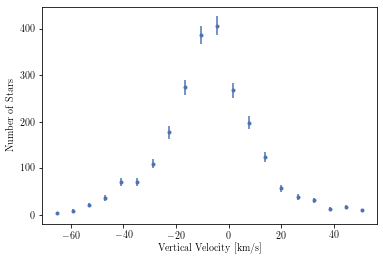

100%|██████████| 100000/100000 [00:30<00:00, 3270.03it/s]


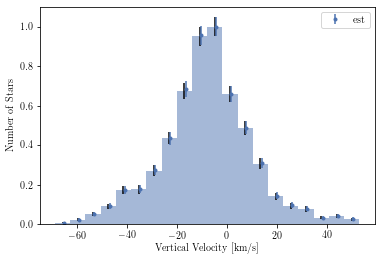

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.38)_(0.40).hdf5


In [81]:
for file in files[2:]:
    gaia = vaex.open(file)
    zs = gaia['z'].to_numpy()
    ws = gaia['w'].to_numpy()
    ews = gaia['e_w'].to_numpy()
    mask = ~np.isnan(ws) & ~np.isnan(ews) & (np.abs(zs) < 50)
    ws = ws[mask]
    ews = ews[mask]

    med = np.median(ws)
    mad = np.median(np.abs(ws-med))
    BIN = 20
    wedge = np.linspace(med-mad*6, med+mad*6, BIN+1)

    wmid = (wedge[1:] + wedge[:-1]) / 2
    wnum, _ = np.histogram(ws, wedge)
    mask = wnum > 0
    wnum = wnum[mask]
    wmid = wmid[mask]
    werr = np.sqrt(wnum)
    max = np.max(wnum)
    # wnum, werr = wnum/max, werr/max
    plt.errorbar(wmid, wnum, yerr=werr, fmt='.')
    plt.xlabel("Vertical Velocity [km/s]")
    plt.ylabel("Number of Stars")
    plt.show()

    M = 100_000
    log_w = np.empty(M, dtype=float)
    ns_est = np.empty((M, len(wmid)), dtype=int)
    for i in tqdm(range(M)):
        x_realization = np.random.normal(loc=ws, scale=ews, size=len(ws))
        ns_est_i = np.histogram(x_realization, bins=wedge)[0]
        ns_est[i] = ns_est_i[mask]

    w_est = np.empty_like(wnum)
    w_err = np.empty_like(wnum)
    for i in range(len(wmid)):
        nw_min = np.floor(ns_est[:, i].min())
        nw_max = np.ceil(ns_est[:, i].max())
        bins = np.arange(nw_min-1/2, nw_max+1/2+0.0001)
        w, n_edge = np.histogram(ns_est[:, i], bins=bins, density=True)
        ns = (n_edge[1:] + n_edge[:-1]) / 2
        mask = w > 0
        w = w[mask]
        ns = ns[mask]
        m = 6
        lambdas = np.linspace(np.maximum(0, np.floor(wnum[i]-m*werr[i])), np.floor(wnum[i]+m*werr[i]), 10_000)
        dlambda = lambdas[1] - lambdas[0]
        pn = np.sum(w[:, None]*poisson.pmf(ns[:,None], lambdas[None, :]), axis=0)
        area = np.trapz(pn, lambdas)
        pn = pn / area
        mu = np.sum(pn * lambdas)*dlambda
        wi_est = mu
        w_est[i] = wi_est
        Elambda2 = np.sum(pn * lambdas**2)*dlambda
        sigma2 = Elambda2 - mu**2
        wi_err = np.sqrt(sigma2)
        w_err[i] = wi_err
        # break

    dw = np.min(np.diff(wedge))
    plt.bar(wmid-0.5, wnum/wnum.max(), yerr=werr/wnum.max(), width=dw, alpha=0.5)
    plt.errorbar(wmid, w_est/w_est.max(), yerr=w_err/w_est.max(), fmt='.', label="est")
    plt.xlabel("Vertical Velocity [km/s]")
    plt.ylabel("Number of Stars")
    plt.legend()
    # plt.yscale('log')
    plt.show()

    wnum, werr = w_est/w_est.max(), w_err/w_est.max()
    
    name = file.split("/")[-1].replace("gaia", "w")
    df = vaex.from_arrays(mid=wmid, num=wnum, err=werr)

    df.export(join(vel_dir, name), progress=True)
    print("saved", name) 

# MCMC

In [82]:
from utils import (plot_corner, plot_chain, plot_fit_w, style, get_params,
                   get_initial_position_normal, get_data, generate_init)

In [86]:
files = glob(join(vel_dir, "w*"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/w_(-0.10)_(0.11).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/w_(0.11)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/w_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/w_(0.20)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/w_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/w_(0.27)_(0.29).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/w_(0.29)_(0.31).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/w_(0.31)_(0.33).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/w_(0.33)_(0.35).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/w_(0.35)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/w_(0.37)_(0.38).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Vel

In [87]:
index = 0
wdata = get_data(vel_dir, index, "w")
wdata

(array([-28.47806441, -26.16440727, -23.85075013, -21.53709298,
        -19.22343584, -16.9097787 , -14.59612155, -12.28246441,
         -9.96880727,  -7.65515012,  -5.34149298,  -3.02783584,
         -0.71417869,   1.59947845,   3.91313559,   6.22679274,
          8.54044988,  10.85410702,  13.16776416]),
 array([0.00617284, 0.01234568, 0.02469136, 0.04320988, 0.11111111,
        0.21604938, 0.28395062, 0.53703704, 0.63580247, 0.98148148,
        1.        , 0.61728395, 0.54938272, 0.37037037, 0.15432099,
        0.09259259, 0.05555556, 0.01851852, 0.00617284]),
 array([0.00617284, 0.00617284, 0.01234568, 0.01234568, 0.02469136,
        0.03703704, 0.04320988, 0.05555556, 0.0617284 , 0.08024691,
        0.08024691, 0.0617284 , 0.05555556, 0.04320988, 0.0308642 ,
        0.02469136, 0.01851852, 0.00617284, 0.00617284]))

In [88]:
from hammer import vel

theta, locs, scales, labels, labs = generate_init("kin")
[(lb, l, t, s+l) for lb,  l, t,s in zip(labels, locs, theta, scales)]

[('$w_0$', -15.0, -7.0, 0.0),
 ('$\\log \\sigma_{w,1}$', 0.0, 1.6094379124341003, 3.4011973816621555),
 ('$\\log \\sigma_{w,2}$', 0.0, 2.302585092994046, 3.4011973816621555),
 ('$\\log a_1$', -4.605170185988091, 0.0, 1.6094379124341005),
 ('$\\log a_2$', -4.605170185988091, 0.0, 1.6094379124341005),
 ('$\\log \\Phi$', 0.0, 2.0, 10.0)]

In [93]:
ndim = len(labs)
nwalker = 12*ndim
p0 = None
while True:
  p0 = vel.generate_p0(nwalker, locs, scales)
  indexes = list(range(ndim))
  prob0 = vel.log_prob_par(p0, wdata, locs, scales)
  mask = np.isinf(prob0[:, 0])
  p0 = p0[~mask]
  if p0.shape[0] % 2 != 0:
    p0 = np.append(p0, p0[0][None, :], axis=0)
  if p0.shape[0] >= ndim*2:
    break
p0.shape

(24, 6)

In [94]:
indexes = list(range(ndim))

for _ in tqdm(range(5)):
    chain = vel.mcmc(5000, p0, wdata, locs, scales, parallel=True, verbose=True)
    locs_normal, scales_normal = get_initial_position_normal("kin", 
                                                              chain=chain[1000:], 
                                                              indexes=indexes)
    p0 = None
    while True:
        p0 = vel.generate_p0(nwalker, locs, scales)
        indexes = list(range(ndim))
        prob0 = vel.log_prob_par(p0, wdata, locs, scales)
        mask = np.isinf(prob0[:, 0])
        p0 = p0[~mask]
        if p0.shape[0] % 2 != 0:
            p0 = np.append(p0, p0[0][None, :], axis=0)
        if p0.shape[0] >= ndim*2:
            break
    print(p0.shape)
    chain = vel.mcmc(5000, p0, wdata, locs, scales, parallel=True, verbose=True)
    p0 = chain[-1]

 20%|██        | 1/5 [00:00<00:02,  1.44it/s]

(12, 6)


 40%|████      | 2/5 [00:01<00:02,  1.49it/s]

(26, 6)


 60%|██████    | 3/5 [00:01<00:01,  1.54it/s]

(16, 6)


 80%|████████  | 4/5 [00:02<00:00,  1.53it/s]

(16, 6)


100%|██████████| 5/5 [00:03<00:00,  1.50it/s]

(14, 6)


In [95]:
chain = vel.mcmc(100_000, p0, wdata, locs, scales, parallel=True, verbose=True)
chain_thin = chain[::100]

6it [00:00, 171.63it/s]


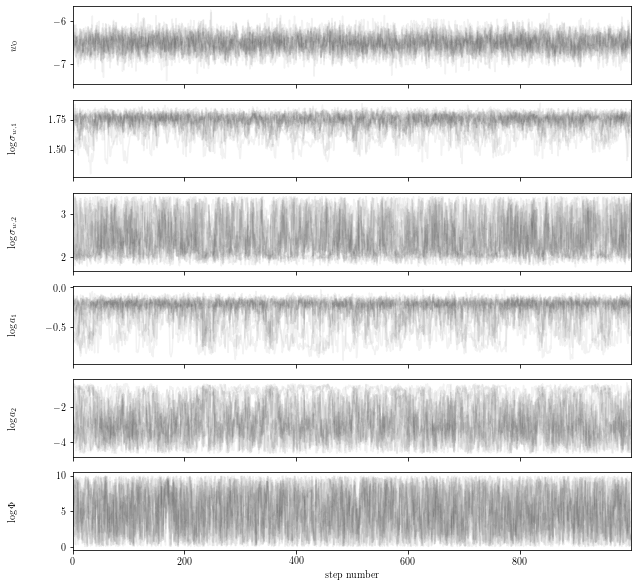

In [99]:
params = get_params(chain_thin, indexes, labs)

plot_chain().params(params).labels(labels).alpha(0.05).run()

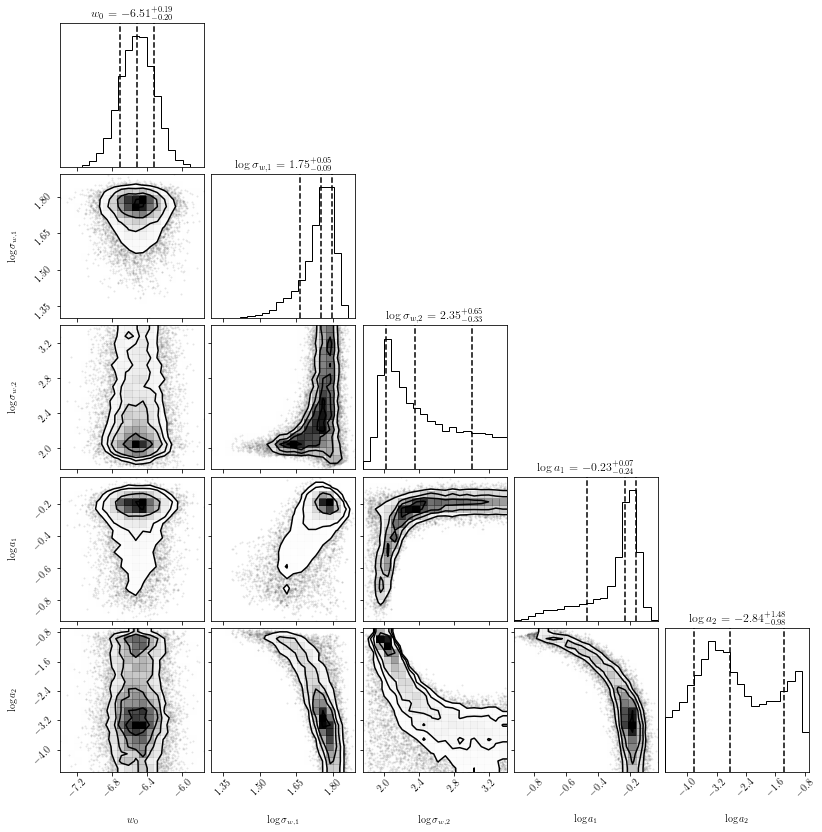

In [97]:
params = get_params(chain_thin, indexes, labs)

plot_corner().params(params[:,:, :-1]).labels(labels[:-1]).run()

100%|██████████| 5000/5000 [00:00<00:00, 33943.78it/s]


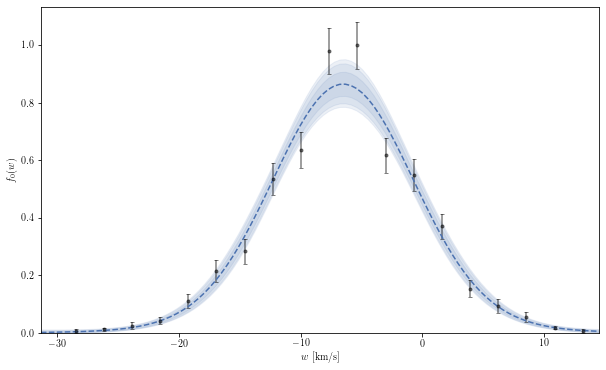

In [101]:
flat_samples = chain_thin.reshape(-1, ndim)

plot_fit_w().index(index).w_dir_path(vel_dir).flat(flat_samples).run()

## automate

In [135]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from os.path import abspath, join
import sys
from glob import glob
import vaex
from tqdm import tqdm
from hammer import vel
from scipy.stats import median_abs_deviation as mad_func
root_dir = abspath(join('..'))
root_data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)

In [136]:
from utils import (plot_corner, plot_chain, plot_fit_w, style, get_params,
                   get_initial_position_normal, get_data, generate_init)
style()

In [137]:
data_dir = join(root_data_dir, "MCMC-no", "vel")

In [138]:
w_dir_path = join(root_data_dir, 'Velocity-Distribution-no')
w_dir_path

'/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no'

(-0.10)_(0.11)


 20%|██        | 1/5 [00:00<00:03,  1.26it/s]

(58, 6)


 40%|████      | 2/5 [00:01<00:02,  1.26it/s]

(50, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.26it/s]

(60, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.24it/s]

(54, 6)


100%|██████████| 5/5 [00:03<00:00,  1.25it/s]

(54, 6)



6it [00:00, 52.44it/s]


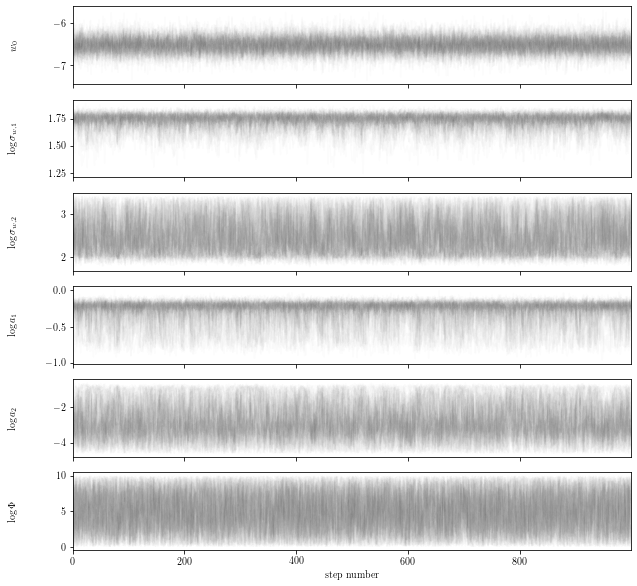

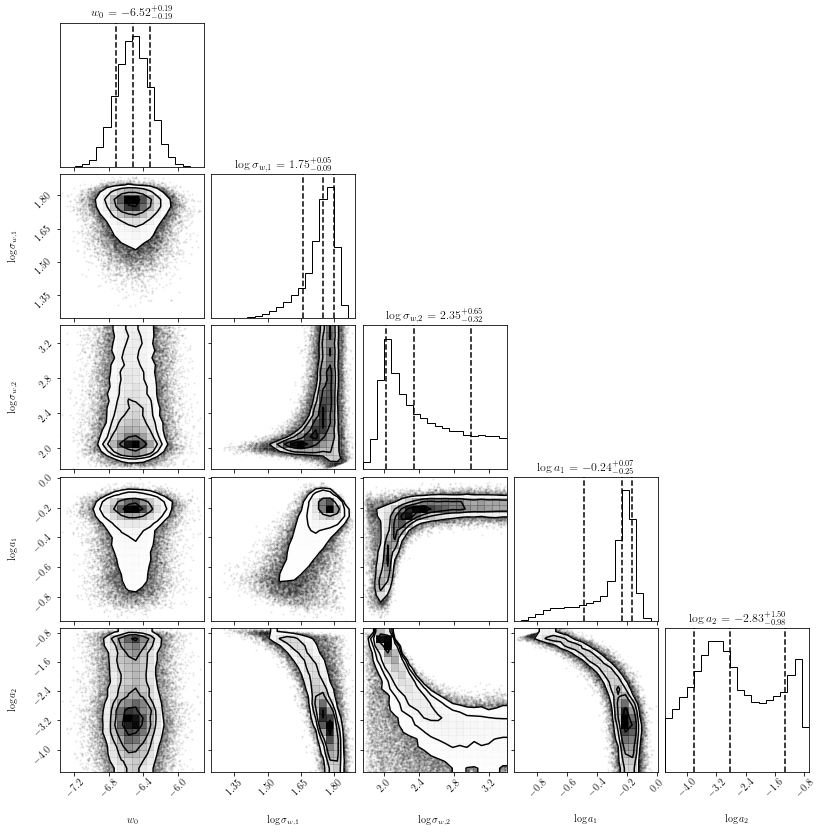

100%|██████████| 5000/5000 [00:00<00:00, 31286.63it/s]


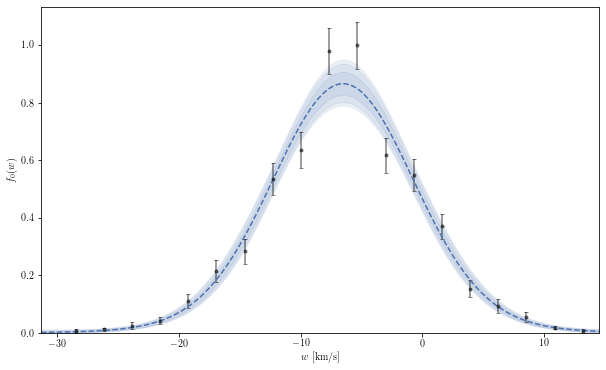

(0.11)_(0.16)


 20%|██        | 1/5 [00:00<00:03,  1.27it/s]

(56, 6)


 40%|████      | 2/5 [00:01<00:02,  1.26it/s]

(60, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.28it/s]

(58, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.27it/s]

(54, 6)


100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

(60, 6)



6it [00:00, 45.76it/s]


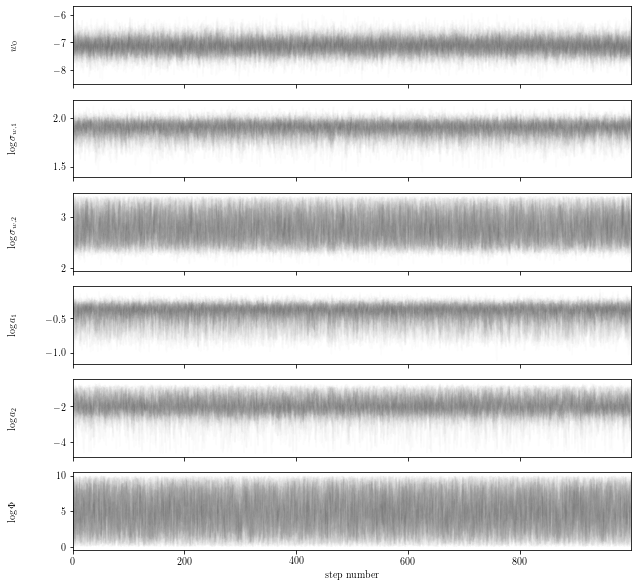

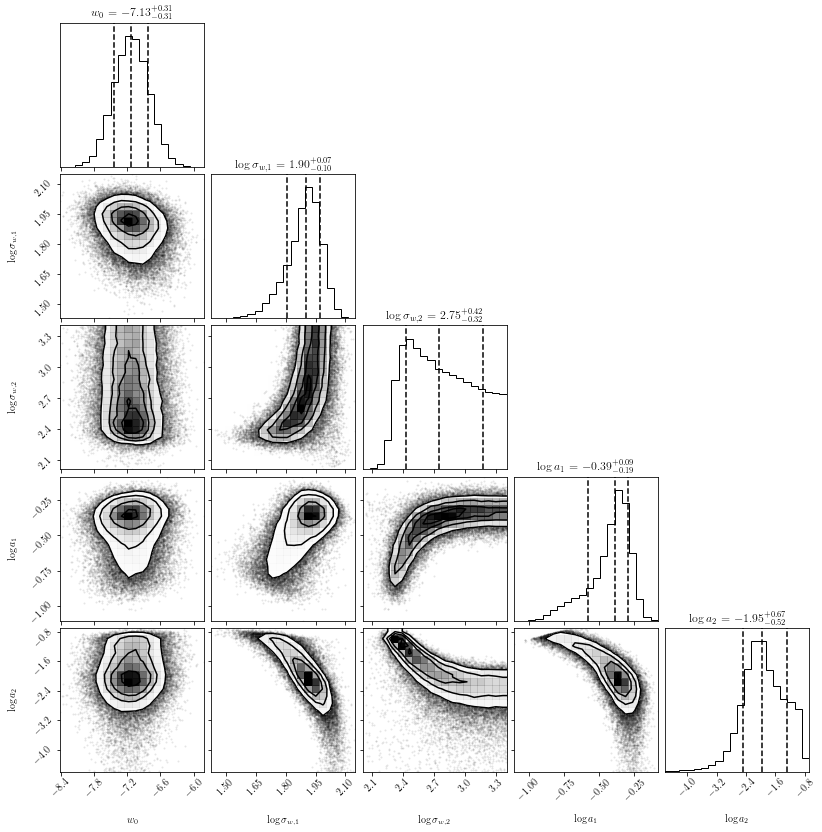

100%|██████████| 5000/5000 [00:00<00:00, 40427.49it/s]


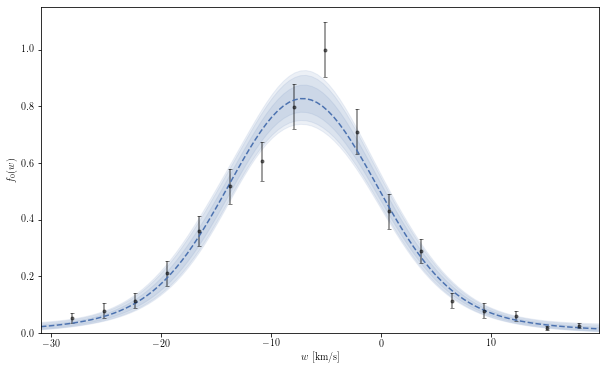

(0.16)_(0.20)


  0%|          | 0/5 [00:00<?, ?it/s]

(58, 6)


 40%|████      | 2/5 [00:01<00:02,  1.34it/s]

(60, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.32it/s]

(58, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.31it/s]

(58, 6)


100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

(58, 6)



6it [00:00, 47.67it/s]


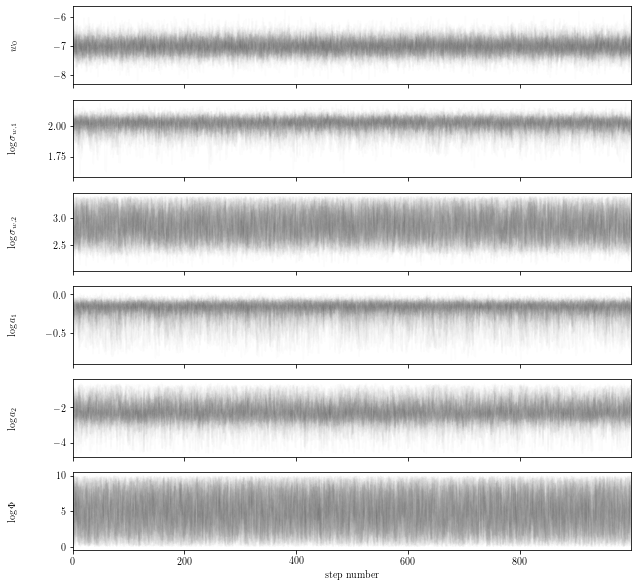

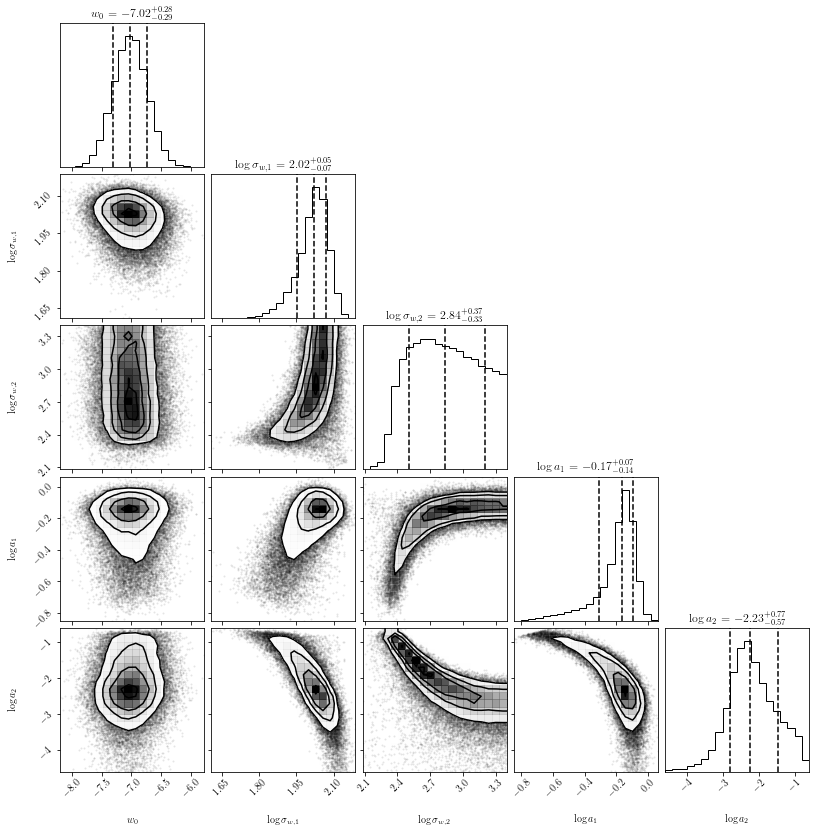

100%|██████████| 5000/5000 [00:00<00:00, 50926.10it/s]


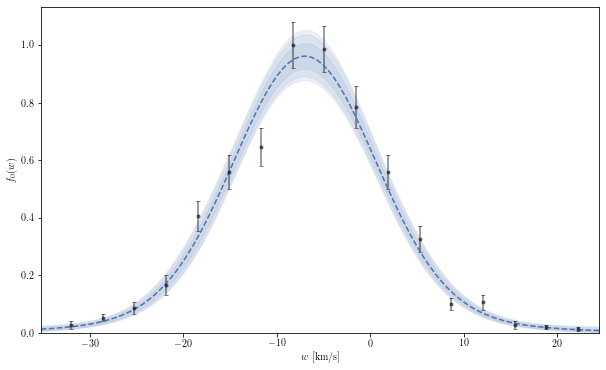

(0.20)_(0.24)


 20%|██        | 1/5 [00:00<00:03,  1.29it/s]

(56, 6)


 40%|████      | 2/5 [00:01<00:02,  1.26it/s]

(54, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.26it/s]

(56, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.26it/s]

(54, 6)


100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

(60, 6)



6it [00:00, 47.64it/s]


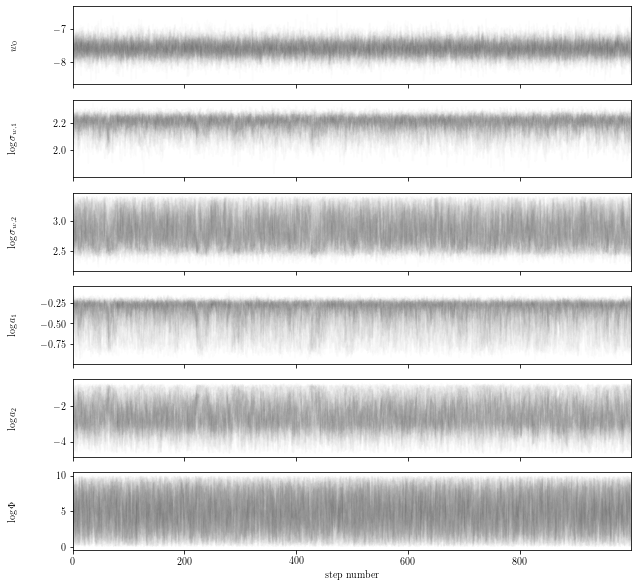

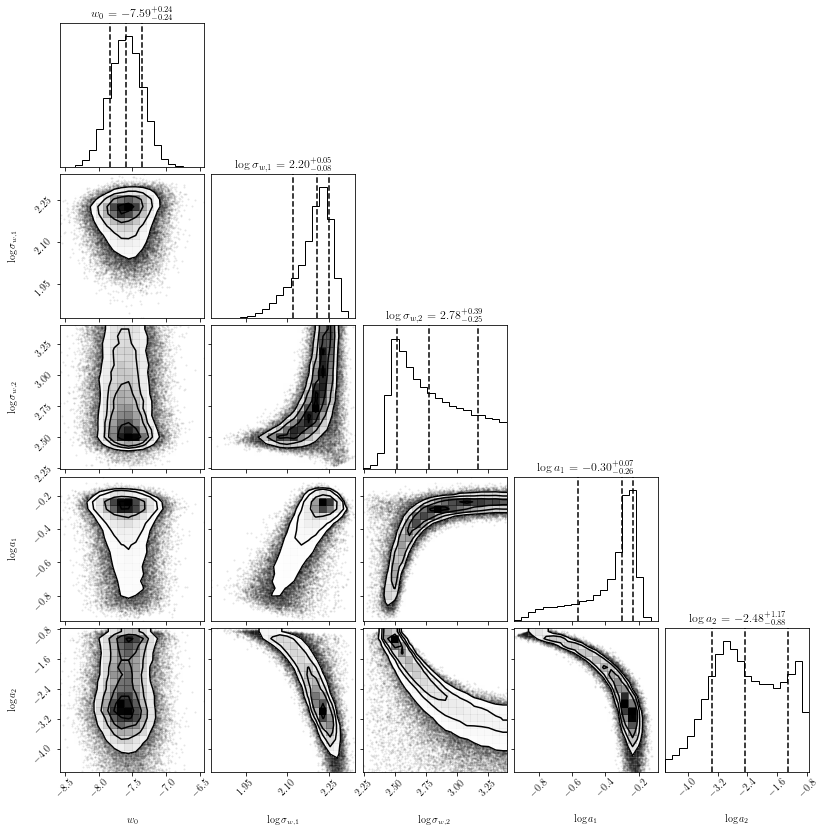

100%|██████████| 5000/5000 [00:00<00:00, 40604.39it/s]


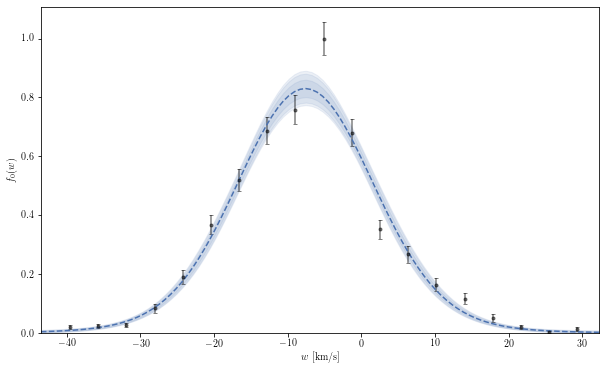

(0.24)_(0.27)


 20%|██        | 1/5 [00:00<00:03,  1.33it/s]

(54, 6)


 40%|████      | 2/5 [00:01<00:02,  1.28it/s]

(54, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.27it/s]

(52, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.26it/s]

(56, 6)
(56, 6)


100%|██████████| 5/5 [00:03<00:00,  1.26it/s]
6it [00:00, 11.77it/s]


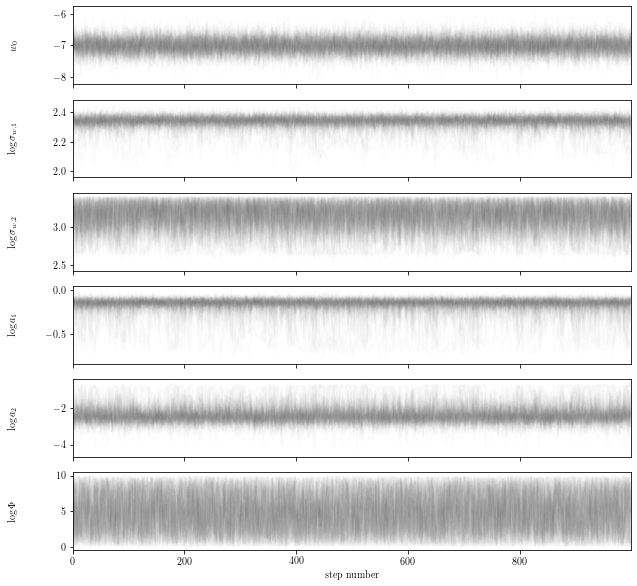

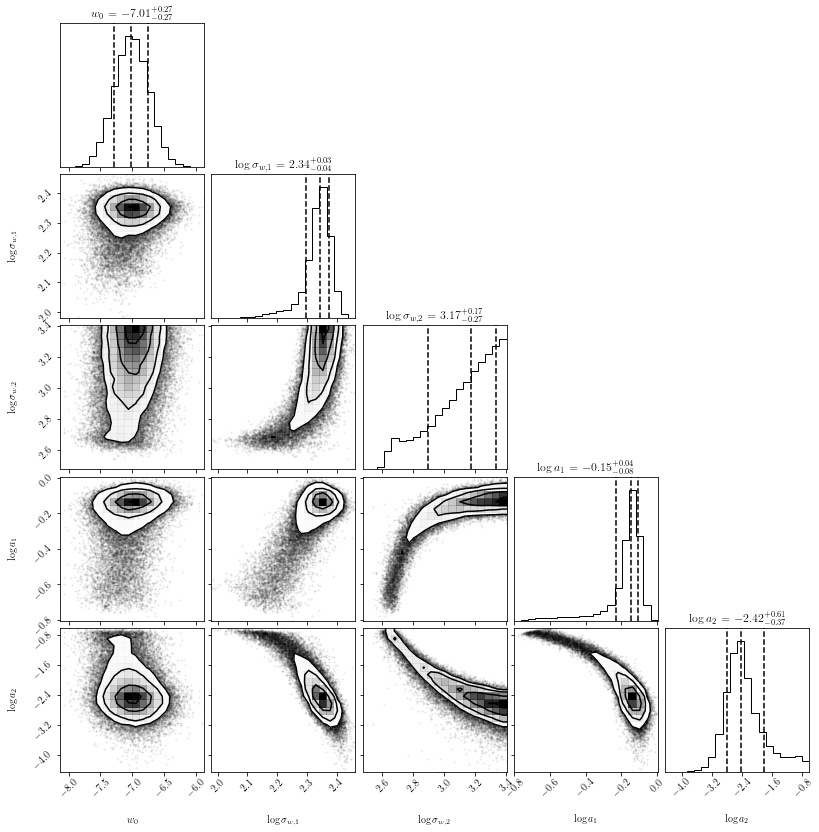

100%|██████████| 5000/5000 [00:00<00:00, 43120.58it/s]


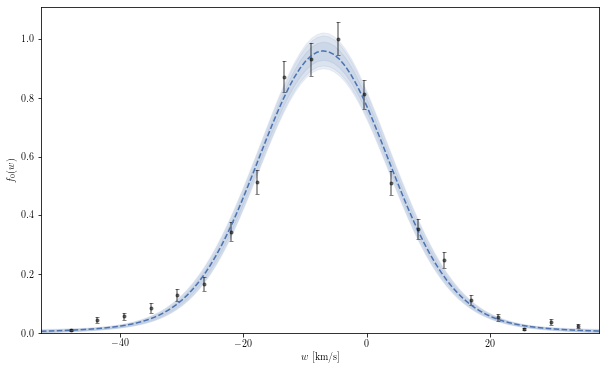

(0.27)_(0.29)


 20%|██        | 1/5 [00:00<00:02,  1.40it/s]

(54, 6)


 40%|████      | 2/5 [00:01<00:02,  1.31it/s]

(56, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.29it/s]

(52, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.27it/s]

(56, 6)


100%|██████████| 5/5 [00:03<00:00,  1.28it/s]

(60, 6)



6it [00:00, 48.12it/s]


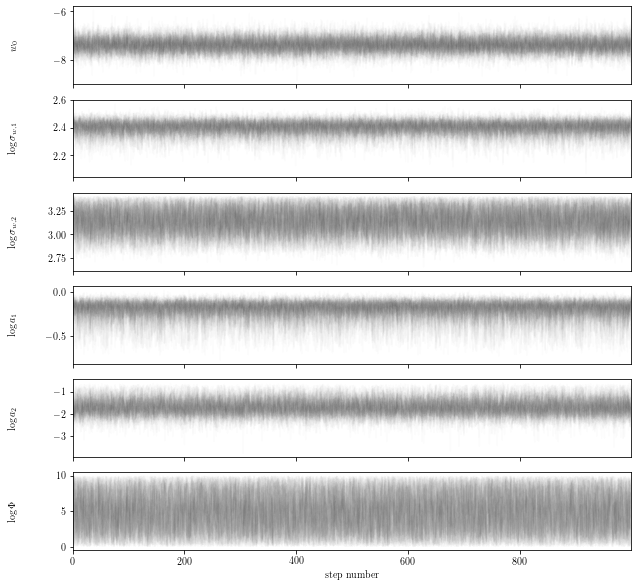

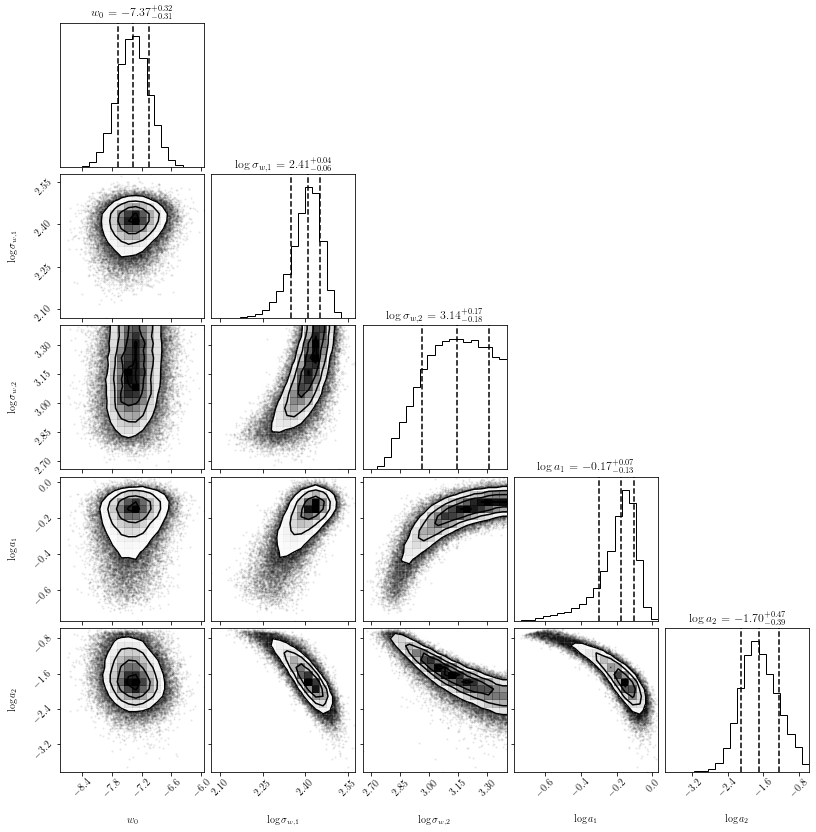

100%|██████████| 5000/5000 [00:00<00:00, 39419.78it/s]


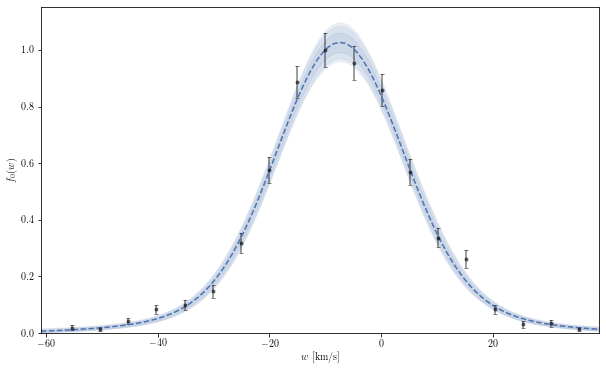

(0.29)_(0.31)


 20%|██        | 1/5 [00:00<00:02,  1.38it/s]

(60, 6)


 40%|████      | 2/5 [00:01<00:02,  1.28it/s]

(60, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.26it/s]

(60, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.25it/s]

(58, 6)


100%|██████████| 5/5 [00:03<00:00,  1.25it/s]

(60, 6)



6it [00:00, 11.33it/s]


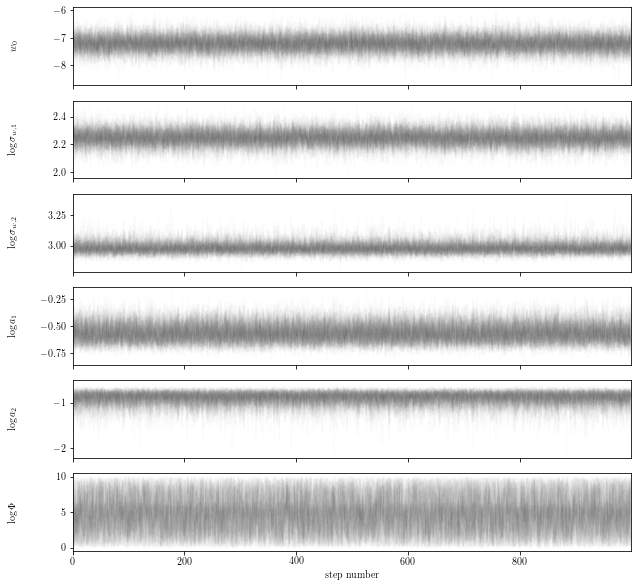

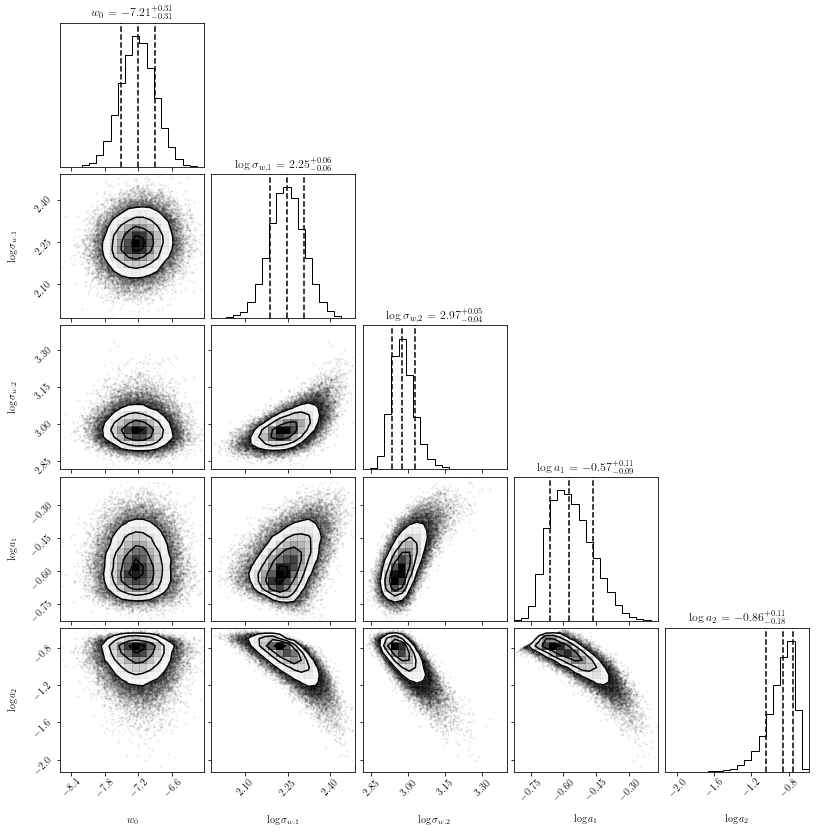

100%|██████████| 5000/5000 [00:00<00:00, 38300.86it/s]


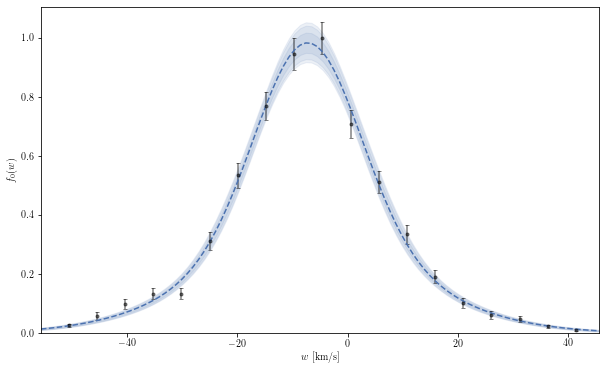

(0.31)_(0.33)


 20%|██        | 1/5 [00:00<00:02,  1.38it/s]

(42, 6)


 40%|████      | 2/5 [00:01<00:02,  1.28it/s]

(58, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.27it/s]

(56, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.26it/s]

(58, 6)


100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

(60, 6)



6it [00:00, 46.79it/s]


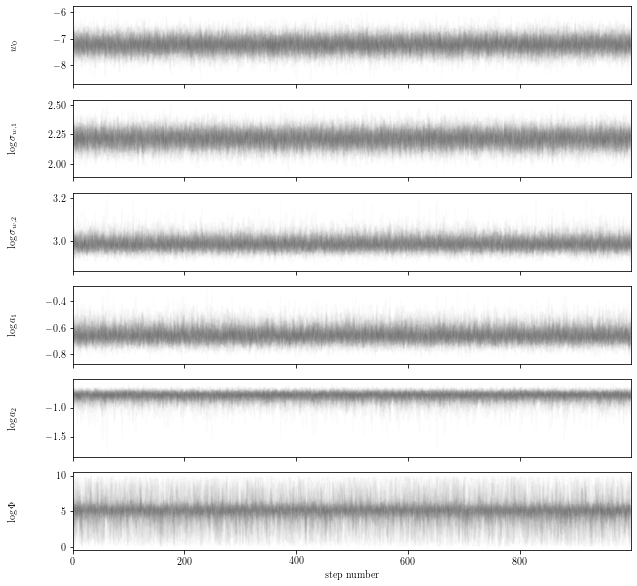

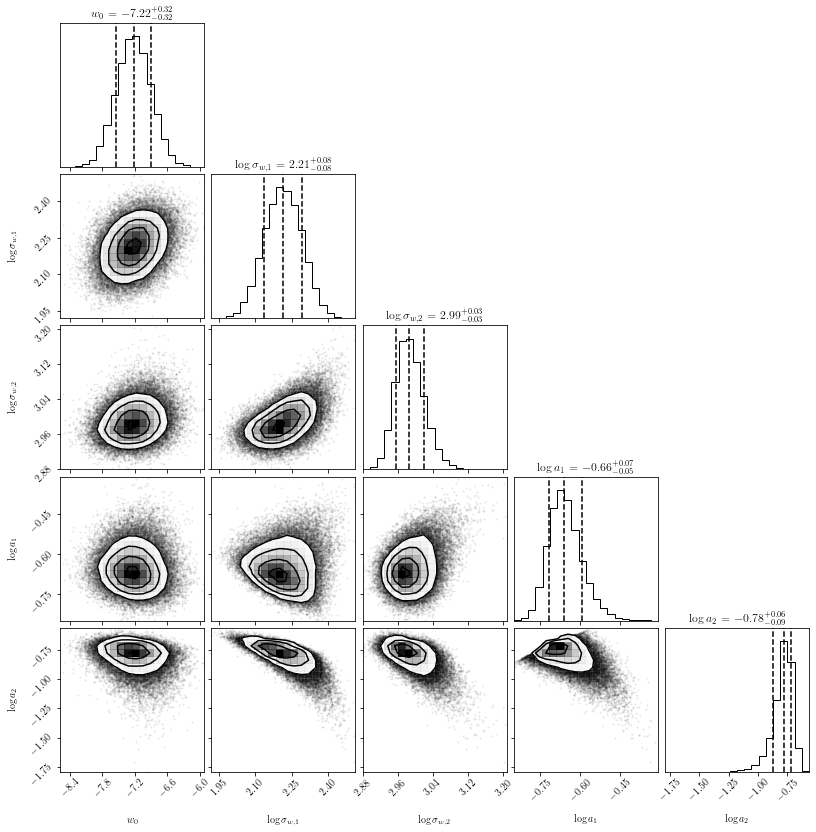

100%|██████████| 5000/5000 [00:00<00:00, 42892.60it/s]


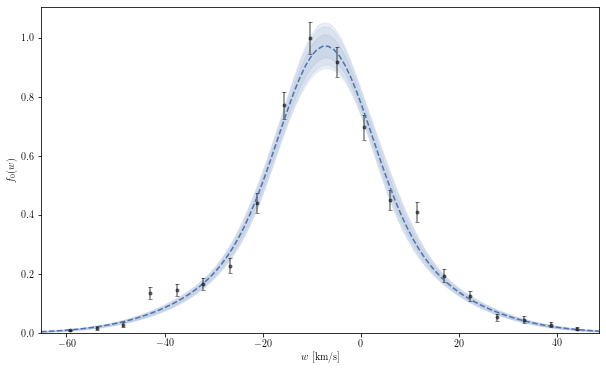

(0.33)_(0.35)


  0%|          | 0/5 [00:00<?, ?it/s]

(58, 6)


 40%|████      | 2/5 [00:01<00:02,  1.21it/s]

(58, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.21it/s]

(58, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.22it/s]

(58, 6)


100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

(60, 6)



6it [00:00, 50.51it/s]


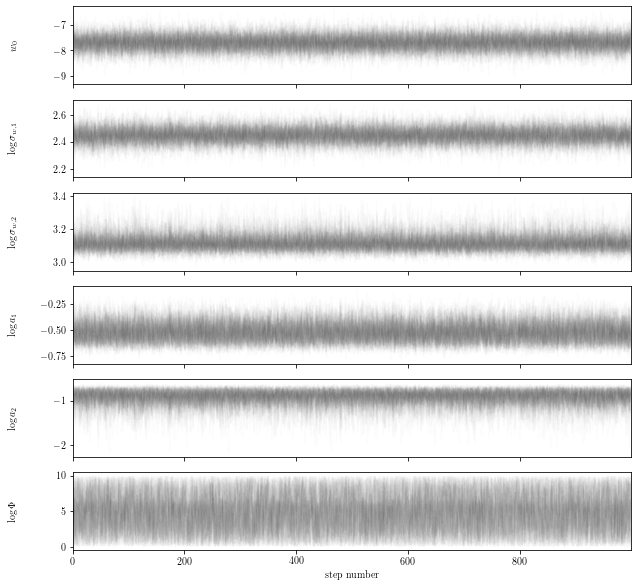

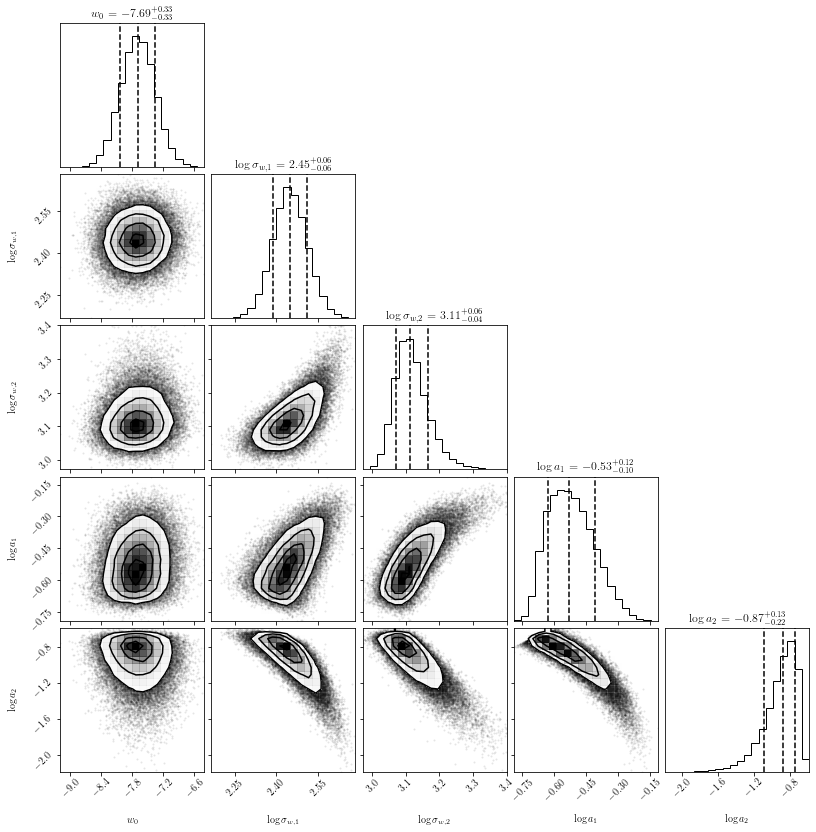

100%|██████████| 5000/5000 [00:00<00:00, 40646.58it/s]


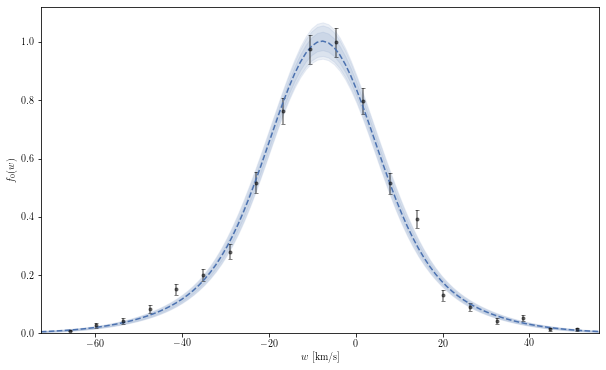

(0.35)_(0.37)


 20%|██        | 1/5 [00:00<00:03,  1.27it/s]

(60, 6)


 40%|████      | 2/5 [00:01<00:02,  1.25it/s]

(56, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.24it/s]

(56, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.25it/s]

(58, 6)


100%|██████████| 5/5 [00:04<00:00,  1.25it/s]

(58, 6)



6it [00:00, 48.73it/s]


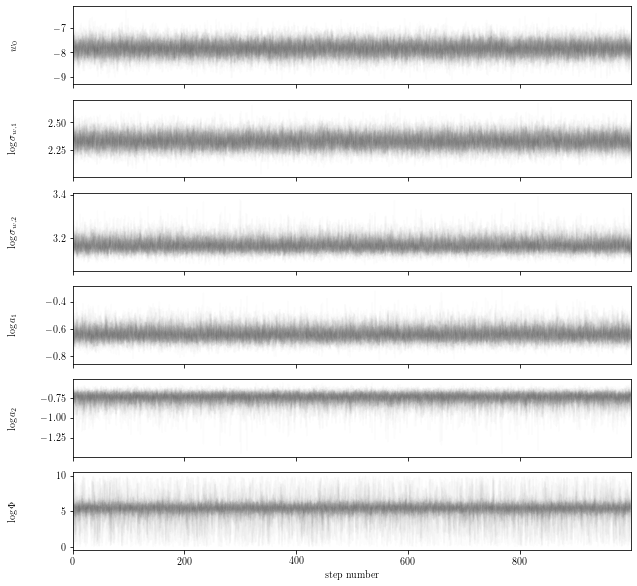

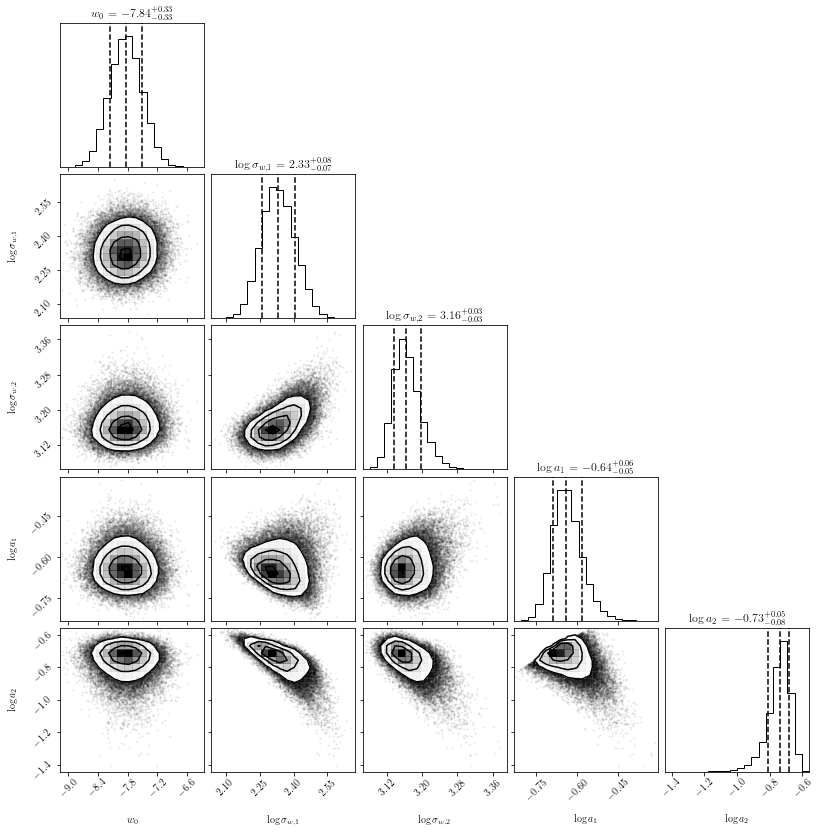

100%|██████████| 5000/5000 [00:00<00:00, 39905.62it/s]


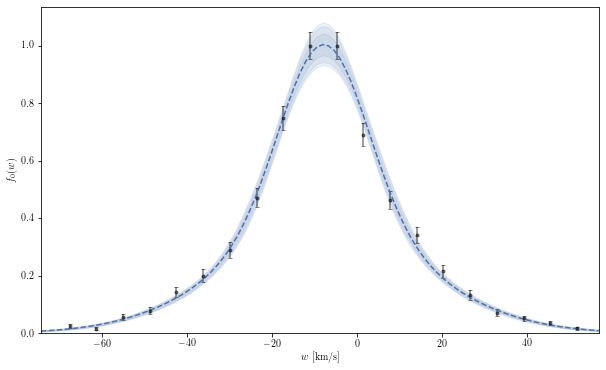

(0.37)_(0.38)


 20%|██        | 1/5 [00:00<00:02,  1.37it/s]

(60, 6)


 40%|████      | 2/5 [00:01<00:02,  1.27it/s]

(60, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.25it/s]

(58, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.24it/s]

(58, 6)


100%|██████████| 5/5 [00:04<00:00,  1.25it/s]

(60, 6)



6it [00:00, 50.16it/s]


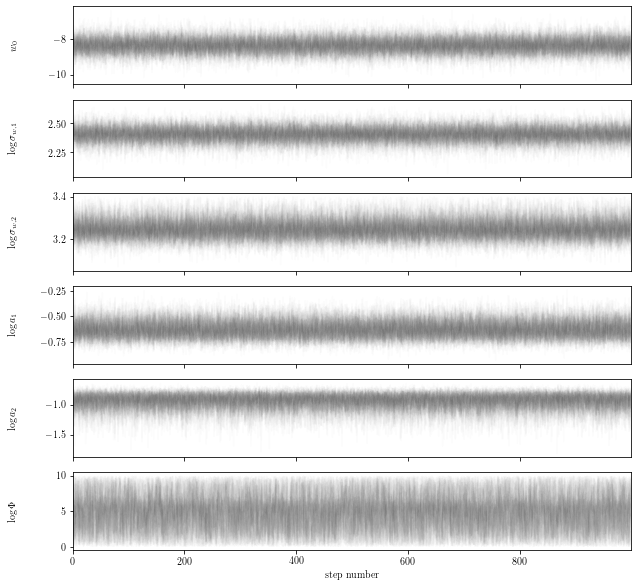

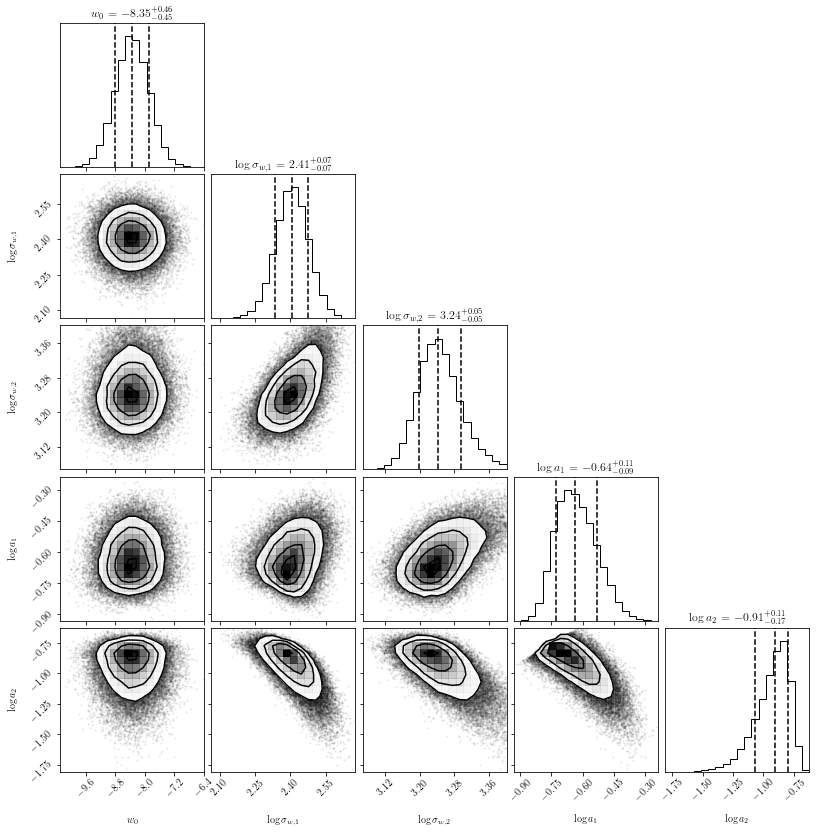

100%|██████████| 5000/5000 [00:00<00:00, 33646.54it/s]


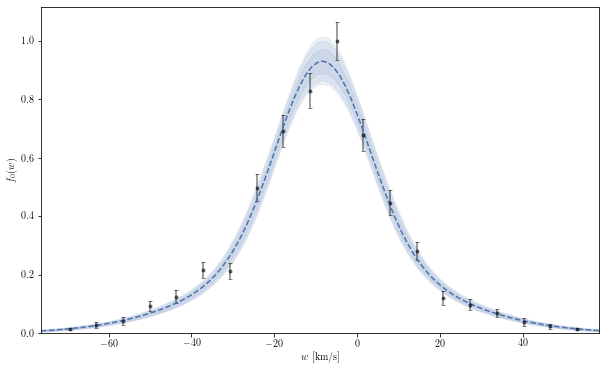

(0.38)_(0.40)


 20%|██        | 1/5 [00:00<00:02,  1.34it/s]

(60, 6)


 40%|████      | 2/5 [00:01<00:02,  1.26it/s]

(60, 6)


 60%|██████    | 3/5 [00:02<00:01,  1.24it/s]

(60, 6)


 80%|████████  | 4/5 [00:03<00:00,  1.24it/s]

(58, 6)


100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

(60, 6)



6it [00:00, 44.31it/s]


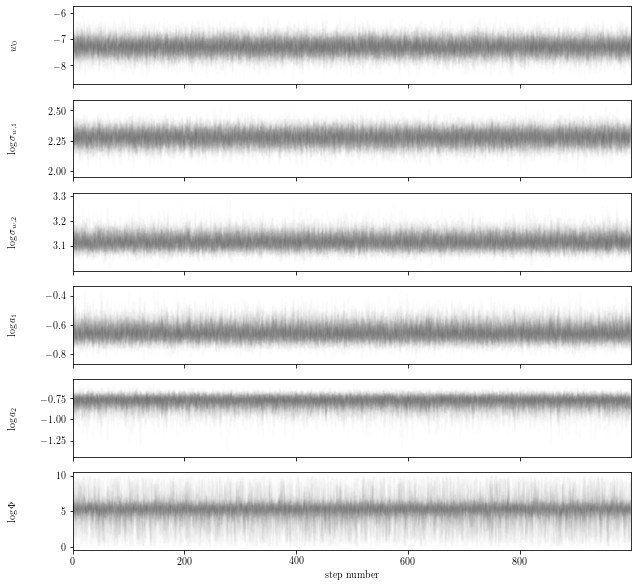

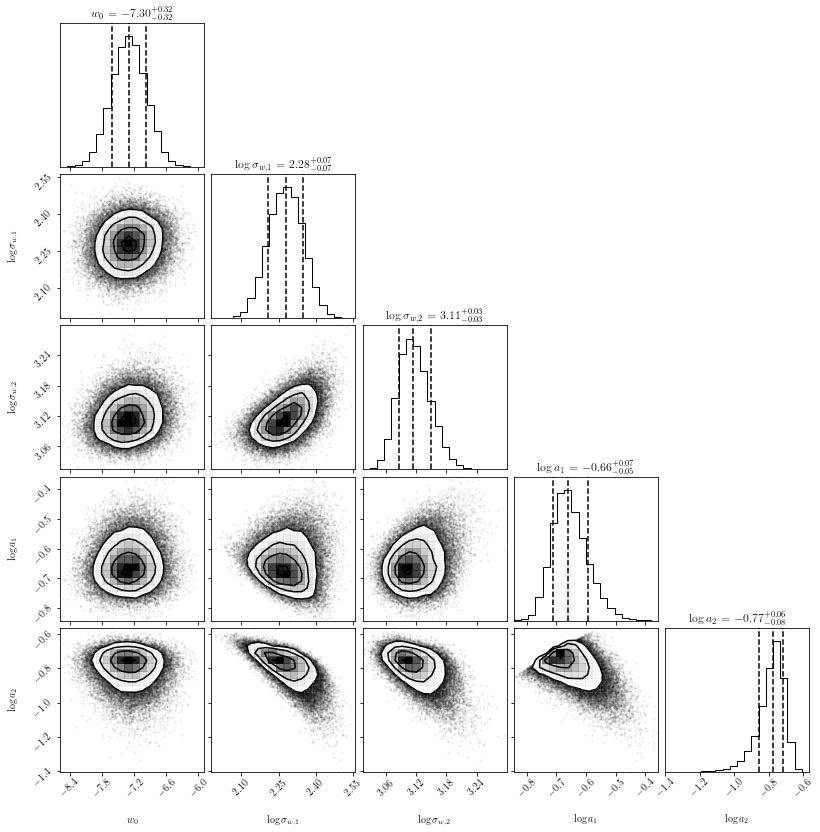

100%|██████████| 5000/5000 [00:00<00:00, 42271.15it/s]


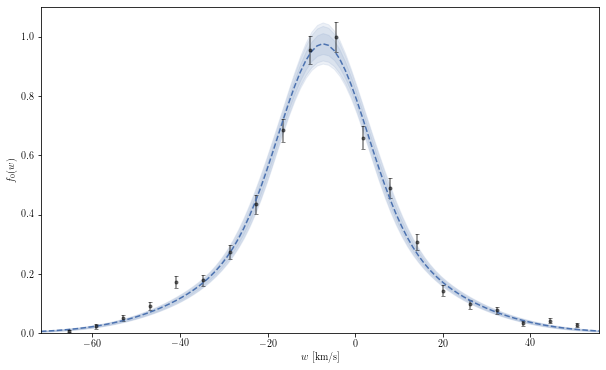

In [155]:
files = glob(join(w_dir_path, "w*"))
files.sort()
for index, file in enumerate(files):
    name = file.split("/")[-1].replace(".hdf5", "").replace("w_", "")
    print(name)
    theta, locs, scales, labels, labs = generate_init("kin")
    ndim = len(labs)
    nwalker = 10*ndim
    p0 = None
    while True:
        p0 = vel.generate_p0(nwalker, locs, scales)
        indexes = list(range(ndim))
        prob0 = vel.log_prob_par(p0, wdata, locs, scales)
        mask = np.isinf(prob0[:, 0])
        p0 = p0[~mask]
        if p0.shape[0] % 2 != 0:
            p0 = np.append(p0, p0[0][None, :], axis=0)
        if p0.shape[0] >= ndim*2:
            break
    indexes = list(range(ndim))
    wdata = get_data(vel_dir, index, "w")
    for _ in tqdm(range(5)):
        chain = vel.mcmc(5000, p0, wdata, locs, scales, parallel=True, verbose=True)
        locs_normal, scales_normal = get_initial_position_normal("kin", 
                                                                  chain=chain[2500:], 
                                                                  indexes=indexes)
        while True:
          p0 = vel.generate_p0(nwalker, locs_normal, scales_normal, norm=True)
          indexes = list(range(ndim))
          prob0 = vel.log_prob_par(p0, wdata, locs, scales)
          mask = np.isinf(prob0[:, 0])
          p0 = p0[~mask]
          if p0.shape[0] % 2 != 0:
              p0 = np.append(p0, p0[0][None, :], axis=0)
          if p0.shape[0] >= ndim*2:
              break
        print(p0.shape)
        chain = vel.mcmc(5000, p0, wdata, locs, scales, parallel=True, verbose=True)
        p0 = chain[-1]
    chain = vel.mcmc(100_000, p0, wdata, locs, scales, parallel=True, verbose=True)
    chain_thin = chain[::100]
    params = get_params(chain_thin, indexes, labs)
    (plot_chain()
     .params(params)
     .labels(labels)
     .alpha(0.01)
     .path(join(data_dir, 'plots', f"chain-{name}.pdf"))
     .run()
    )
    params = get_params(chain_thin, indexes, labs)
    (plot_corner()
     .params(params[:,:, :-1])
     .labels(labels[:-1])
     .path(join(data_dir, 'plots', f"corner-{name}.pdf"))
     .run()
    )
    flat_samples = chain_thin.reshape(-1, ndim)
    (plot_fit_w()
     .index(index)
     .w_dir_path(vel_dir)
     .flat(flat_samples)
     .path(join(data_dir, 'plots', f"fit-{name}.pdf"))
     .run()
    )
    np.save(join(data_dir, 'data', f"chain-{name}.npy"), chain_thin)

# Load

In [156]:
files = glob(join(data_dir, 'data', "*.npy"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(-0.10)_(0.11).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.11)_(0.16).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.16)_(0.20).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.20)_(0.24).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.24)_(0.27).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.27)_(0.29).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.29)_(0.31).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.31)_(0.33).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.33)_(0.35).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.35)_(0.37).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.37)_(0.38).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/vel/data/chain-(0.38)_(0.40).npy']

In [158]:
names = [f.split("/")[-1].replace("chain-", "") for f in files]
names

['(-0.10)_(0.11).npy',
 '(0.11)_(0.16).npy',
 '(0.16)_(0.20).npy',
 '(0.20)_(0.24).npy',
 '(0.24)_(0.27).npy',
 '(0.27)_(0.29).npy',
 '(0.29)_(0.31).npy',
 '(0.31)_(0.33).npy',
 '(0.33)_(0.35).npy',
 '(0.35)_(0.37).npy',
 '(0.37)_(0.38).npy',
 '(0.38)_(0.40).npy']

In [159]:
import re

# capture string within parenthesis ()

c = [re.findall(r'\((.*?)\)', name) for name in names]
c0 = np.array([float(ci[0]) for ci in c])
c1 = np.array([float(ci[1]) for ci in c])
c = (c0+c1)/2
c

array([0.005, 0.135, 0.18 , 0.22 , 0.255, 0.28 , 0.3  , 0.32 , 0.34 ,
       0.36 , 0.375, 0.39 ])

In [166]:
for i, file in enumerate(tqdm(files)):
    flat_samples = np.load(file)
    print(flat_samples.shape)

100%|██████████| 12/12 [00:00<00:00, 595.39it/s]

(1000, 54, 6)
(1000, 60, 6)
(1000, 58, 6)
(1000, 60, 6)
(1000, 56, 6)
(1000, 60, 6)
(1000, 60, 6)
(1000, 60, 6)
(1000, 60, 6)
(1000, 58, 6)
(1000, 60, 6)
(1000, 60, 6)


In [192]:
from scipy.integrate import simps
from hammer import vel

Ew = np.empty((len(c), 1000*50))
Ew2 = np.empty((len(c), 1000*50))
ws = np.linspace(-100, 100, 1000)
ndim = 6
for i, file in enumerate(tqdm(files)):
    chain = np.load(file)
    flat_samples = chain.reshape((-1, ndim))
    flat_samples = flat_samples[:1000*50]
    fw = np.empty((1000*50, len(ws)))
    for j in range(1000*50):
        fw[j] = vel.fw(ws, flat_samples[j])
    mean = simps(fw*ws[None, :], ws[None, :], axis=1)/simps(fw, ws[None, :], axis=1)
    rms = simps(fw*ws[None, :]*ws[None, :],ws[None, :], axis=1)/simps(fw, ws[None, :], axis=1)
    Ew[i] = mean
    Ew2[i] = rms

100%|██████████| 12/12 [01:50<00:00,  9.23s/it]


In [193]:
variances = Ew2 - Ew*Ew
means = Ew
sigmas = np.sqrt(variances)

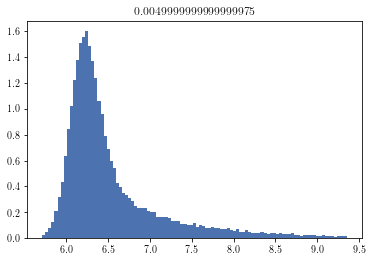

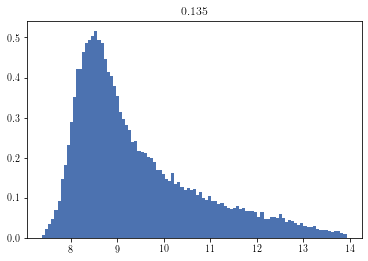

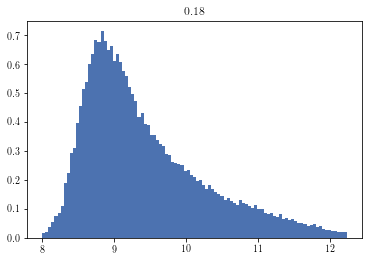

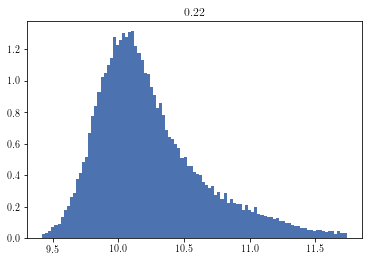

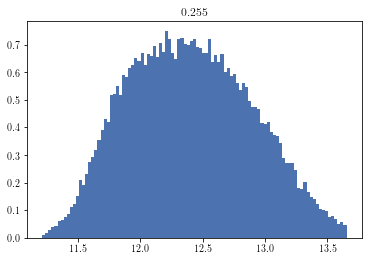

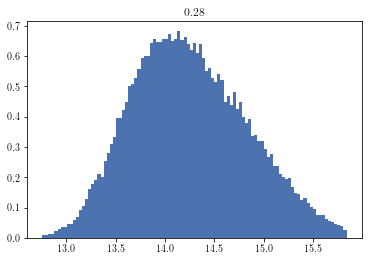

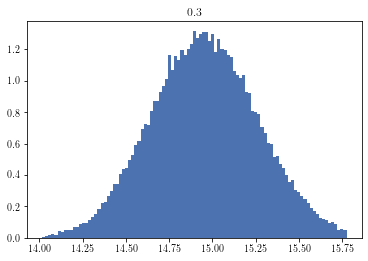

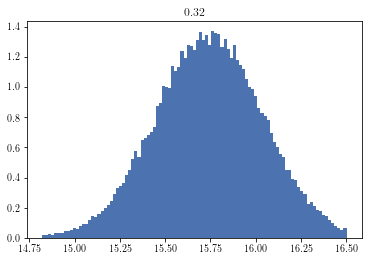

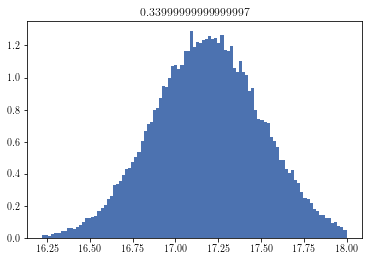

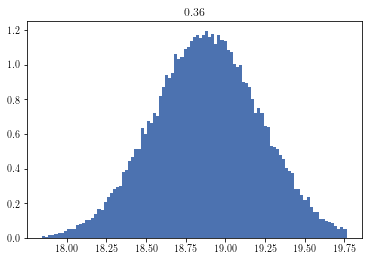

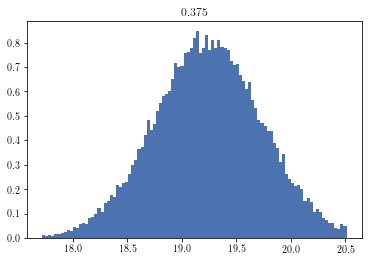

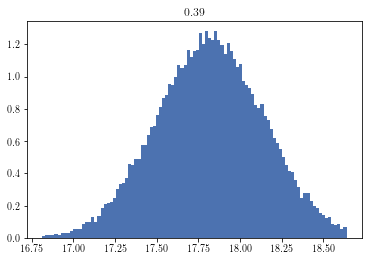

In [194]:
for ci, sig in zip(c, sigmas):
    edge = np.linspace(np.percentile(sig, 0.1), np.percentile(sig, 99.4), 100)
    plt.hist(sig, bins=edge, density=True)
    plt.title(ci)
    plt.show()

In [195]:
mean_w0 = np.mean(means, axis=1)
sigma_w0 = np.std(means, axis=1)

<ErrorbarContainer object of 3 artists>

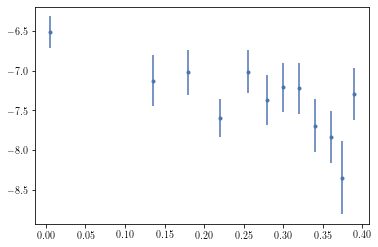

In [196]:
plt.errorbar(c, mean_w0, yerr=sigma_w0, fmt='.')

In [197]:
mean_sigmaw = np.mean(sigmas, axis=1)
sigma_sigmaw = np.std(sigmas, axis=1) 

<ErrorbarContainer object of 3 artists>

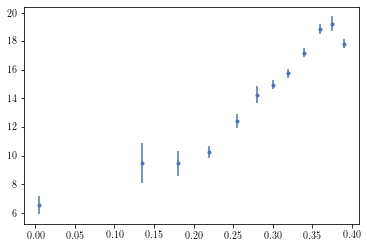

In [198]:
plt.errorbar(c, mean_sigmaw, yerr=sigma_sigmaw, fmt='.')

In [203]:
median_sigmaw = np.median(sigmas, axis=1)
mad_sigmaw = np.median(np.abs(sigmas-np.repeat(median_sigmaw, 50_000).reshape(-1, 50_000)), axis=1)

<ErrorbarContainer object of 3 artists>

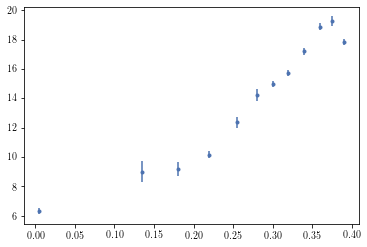

In [204]:
plt.errorbar(c, median_sigmaw, yerr=mad_sigmaw, fmt='.')